# Data analysis for "The variable background of XMM-Newton"

Data analysis for a thesis submitted in fullfillment of the requirements for the Bachelor’s Degree in Physics.

More details on the thesis [here](https://it.overleaf.com/read/qzyvtnfmqtqr) and on the [GitHub page](https://github.com/nikitodos/xmm-newton/).

Author: Giovanni Nicola D'Aloisio.

In [1]:
# Import libraries

import numpy as np
import scipy
from scipy import optimize as sop
from scipy import constants as scc
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import chi2_contingency
import astropy

## Distribution of the particles

This is a preliminary step in the data analysis for the thesis project.

Plotting the distribution of the particles' energy at the output of the filters allows to determine the statistical distribution, and therefore to estimate the best way to compute the mean and the uncertainty of the final energies.

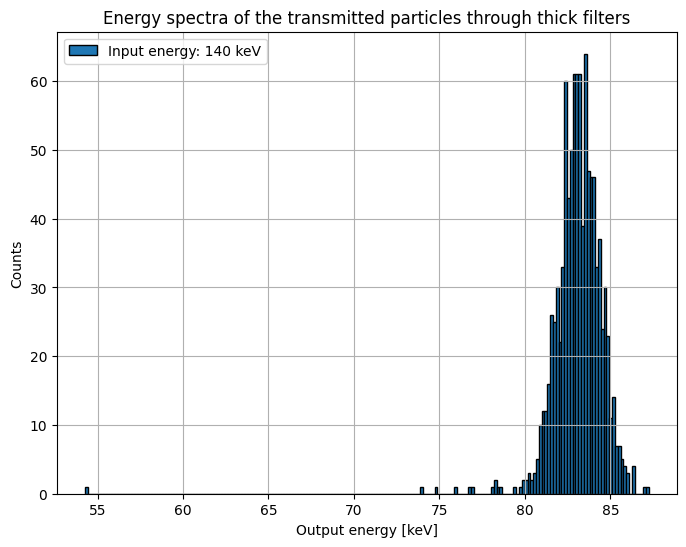

In [2]:
# Import the data

data = 'https://raw.githubusercontent.com/nikitodos/xmm-newton/main/Simulations/SRIM_ProtonsVsFilters/RawData/TransmissionData_CSVs/ThickFilter/1k_Ions/Raw_ThickFilterSim_140keV.csv'
data = pd.read_csv(data, sep = ',')

energy_spectra = data.to_numpy()
energy_spectra = energy_spectra[:, 3]
energy_spectra = energy_spectra/1000      # Data in keV

# Plot of the energetic spectra of protons in input to the thick filter at 140 keV

plt.figure(figsize=(8, 6))
plt.hist(energy_spectra, bins=200, edgecolor='k', label='Input energy: 140 keV')
plt.xlabel('Output energy [keV]')
plt.ylabel('Counts')
plt.title('Energy spectra of the transmitted particles through thick filters')
plt.grid(True)

plt.legend()

plt.show()


It's evident that's the curve is a pretty good Gaussian, therefore standard deviation and arithmetical mean are good tools for calculating the mean final energy and, as a consequence, mean energy loss in the filters. Therefore, the output energy value for each beam of particles with fixed energy is:

$$\bar{E}_\text{final} = \frac{1}{N} \sum\limits_{i=1}^{N} x_i$$

$$\Delta E_\text{final} = \frac{1}{\sqrt{N}} \sqrt{\frac{1}{N-1} \sum\limits_{i=1}^{N} (x_i - \bar{x})^2}$$

Therefore:

$$E_\text{final} = \bar{E}_\text{final} \pm \Delta E_\text{final} \quad \quad CL=68.27 \%$$

For each beam.

## Filters models

In this section a test function is being used to estimate the behaviour of the filters themselves, establishing a connection between final and initial energy of the particles and energy loss in the filters, in the low gain domain (20-120 keV) of the XMM-Newton telescope.

The data imported in this section had been previously processed as shown in the previous one.

In [3]:
# Import the data

thick_proton_data = 'https://raw.githubusercontent.com/nikitodos/xmm-newton/main/Simulations/SRIM_ProtonsVsFilters/DataAnalysis/ThickFilter.CSV'
thick_proton_data = pd.read_csv(thick_proton_data, sep = ',')

thin_proton_data = 'https://raw.githubusercontent.com/nikitodos/xmm-newton/main/Simulations/SRIM_ProtonsVsFilters/DataAnalysis/ThinFilter.CSV'
thin_proton_data = pd.read_csv(thin_proton_data, sep = ',')

thick_alpha_data = 'https://raw.githubusercontent.com/nikitodos/xmm-newton/main/Simulations/SRIM_AlphasVsFilters/DataAnalysis/ThickFilter.CSV'
thick_alpha_data = pd.read_csv(thick_alpha_data, sep = ',')

thin_alpha_data = 'https://raw.githubusercontent.com/nikitodos/xmm-newton/main/Simulations/SRIM_AlphasVsFilters/DataAnalysis/ThinFilter.CSV'
thin_alpha_data = pd.read_csv(thin_alpha_data, sep = ',')


### Protons and thick filters

In [4]:
# Convert useful data into numpy arrays

counts           = thick_proton_data['Number of ions transmitted []'].to_numpy()       # Number of ions transmitted (normalized over 100 ions)
energy_loss      = thick_proton_data['Mean energy loss [keV]'].to_numpy()              # Mean energy loss [keV]     (got through statistical methods)
final_energy     = thick_proton_data['Mean final energy [keV]'].to_numpy()             # Mean final energy [keV]    (got through statistical methods)
initial_energy   = thick_proton_data['Initial energy [keV]'].to_numpy()                # Initial energy [keV]       (set on SRIM's GUI)
energy_loss_err  = thick_proton_data['Error on mean energy loss [keV]'].to_numpy()     # Error on mean energy loss [keV]  (got through statistical methods)
final_energy_err = thick_proton_data['Error on mean final energy [keV]'].to_numpy()    # Error on mean final energy [keV] (got through statistical methods)


In [5]:
# Print the original data

printx=[initial_energy, final_energy, energy_loss, final_energy_err, energy_loss_err, counts]

print('The complete data are the following:')

for i in printx:
  print(i)
  print("The length of this array is:" , len(i))

print("Only the data between 20 and 120 keV as output energy are to be used, being the low gain mode.")

The complete data are the following:
[  1  10  20  30  40  50  60  70  80  90 100 120 140 160 180 200 210 220
 225 250]
The length of this array is: 20
[  0.    0.    0.    0.    0.4   2.6   7.2  13.5  21.1  29.9  39.6  60.7
  83.1 106.  128.8 147.8 158.9 170.2 175.8 203.5]
The length of this array is: 20
[ 1.  10.  20.  30.  39.6 47.4 52.8 56.5 58.9 60.1 60.4 59.3 56.9 54.
 51.2 52.2 51.1 49.8 49.2 46.5]
The length of this array is: 20
[1.0e-06 1.0e-06 1.0e-06 1.0e-06 2.0e-01 9.0e-01 1.3e+00 1.5e+00 1.6e+00
 1.7e+00 1.8e+00 1.9e+00 1.6e+00 1.4e+00 1.2e+00 1.1e+00 1.5e+00 1.4e+00
 1.2e+00 1.0e+00]
The length of this array is: 20
[ 0.   0.   0.   0.  27.5 15.9  9.4  6.2  4.5  3.4  2.8  1.9  1.1  0.7
  0.5  0.4  0.5  0.4  0.3  0.2]
The length of this array is: 20
[  0.     0.     0.     0.     4.2   72.68  94.62  98.46  99.39  99.73
  99.75  99.9  100.   100.   100.   100.   100.   100.   100.   100.  ]
The length of this array is: 20
Only the data between 20 and 120 keV as output energy

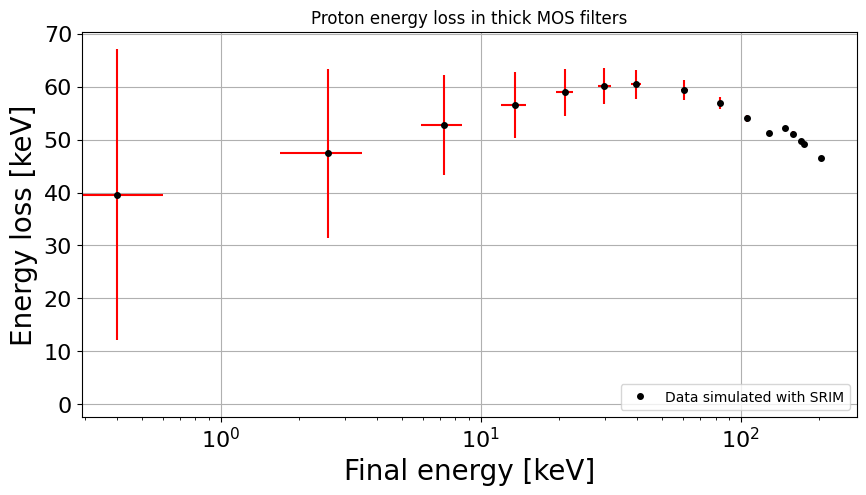

In [6]:
# Plot the whole data, even if some points are out of the fit range

plt.figure(figsize=[10,5])
plt.title('Proton energy loss in thick MOS filters')
plt.xlabel('Final energy [keV]', fontsize=20)
plt.ylabel('Energy loss [keV]', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(True)
plt.xscale("log")
plt.errorbar(final_energy,energy_loss,xerr=final_energy_err,yerr=energy_loss_err, fmt=' ', color='red')
plt.plot(final_energy, energy_loss, 'o', markersize=4, color='black', label='Data simulated with SRIM')
plt.legend(loc="lower right")


In [7]:
# Function to be fitted

def energy_function(Efinal, DeltaEf, c, Ec):
    Einitial = Efinal + DeltaEf + c * Efinal* np.exp(-Efinal/Ec)   # Parameters DeltaEf, c, Ec
    # Cutoff energy Ec tells to the function when to go down
    return Einitial

def counts_function(E, k, DeltaE, alpha):
    counts=k*(E+DeltaE)**(-alpha)  # Parameters: k, alpha, DeltaE
    return counts


In [8]:
# Removing the data not in 20-120 keV interval of output/final energy

final_energy = np.delete(final_energy, np.s_[14:], axis=0)
energy_loss = np.delete(energy_loss, np.s_[14:], axis=0)
counts = np.delete(counts, np.s_[14:], axis=0)
initial_energy = np.delete(initial_energy, np.s_[14:], axis=0)
final_energy_err = np.delete(final_energy_err, np.s_[14:], axis=0)
energy_loss_err = np.delete(energy_loss_err, np.s_[14:], axis=0)

final_energy = np.delete(final_energy, [0])
energy_loss = np.delete(energy_loss, [0])
counts = np.delete(counts, [0])
initial_energy = np.delete(initial_energy, [0])
final_energy_err = np.delete(final_energy_err, [0])
energy_loss_err = np.delete(energy_loss_err, [0])

print('The data are now in the range 20-120 keV as final energy required by the counts function')


The data are now in the range 20-120 keV as final energy required by the counts function


In [9]:
# Removing the data with error not defined (the sputtering component, until 30 keV)

final_energy = np.delete(final_energy, [0])
energy_loss = np.delete(energy_loss, [0])
counts = np.delete(counts, [0])
initial_energy = np.delete(initial_energy, [0])
final_energy_err = np.delete(final_energy_err, [0])
energy_loss_err = np.delete(energy_loss_err, [0])

final_energy = np.delete(final_energy, [0])
energy_loss = np.delete(energy_loss, [0])
counts = np.delete(counts, [0])
initial_energy = np.delete(initial_energy, [0])
final_energy_err = np.delete(final_energy_err, [0])
energy_loss_err = np.delete(energy_loss_err, [0])

final_energy = np.delete(final_energy, [0])
energy_loss = np.delete(energy_loss, [0])
counts = np.delete(counts, [0])
initial_energy = np.delete(initial_energy, [0])
final_energy_err = np.delete(final_energy_err, [0])
energy_loss_err = np.delete(energy_loss_err, [0])

In [10]:
# Fit for energy_function

popt, pcov = sop.curve_fit(energy_function,           # Function to be fitted
                           final_energy,              # Final energy
                           initial_energy,            # Initial energy
                           p0 = [35, 1.5, 50],        # Guess (DeltaE, Cf, Eff)
                           ftol=1e-10,                # Relative tolerance
                           xtol=1e-10,                # Absolute tolerance
                           sigma = final_energy_err)  # Uncertainties

# Define the output parameters

DeltaEf_fit = popt[0]
cf_fit      = popt[1]
Eff_fit     = popt[2]
std_err = np.sqrt(np.diag(pcov))

print('Parameters fitted for the energy function')
print('ΔEf_fit      =', np.format_float_scientific(DeltaEf_fit, precision=2), ' ± ', np.format_float_scientific(std_err[0], precision=1), "keV")
print('c_fit        =', np.format_float_scientific(cf_fit,      precision=2), ' ± ', np.format_float_scientific(std_err[1], precision=1))
print('E_cutoff_fit =', np.format_float_scientific(Eff_fit,     precision=2), ' ± ', np.format_float_scientific(std_err[2], precision=1), "keV")

Parameters fitted for the energy function
ΔEf_fit      = 3.92e+01  ±  5.0e-01 keV
c_fit        = 1.69e+00  ±  2.4e-01
E_cutoff_fit = 3.93e+01  ±  4.1e+00 keV


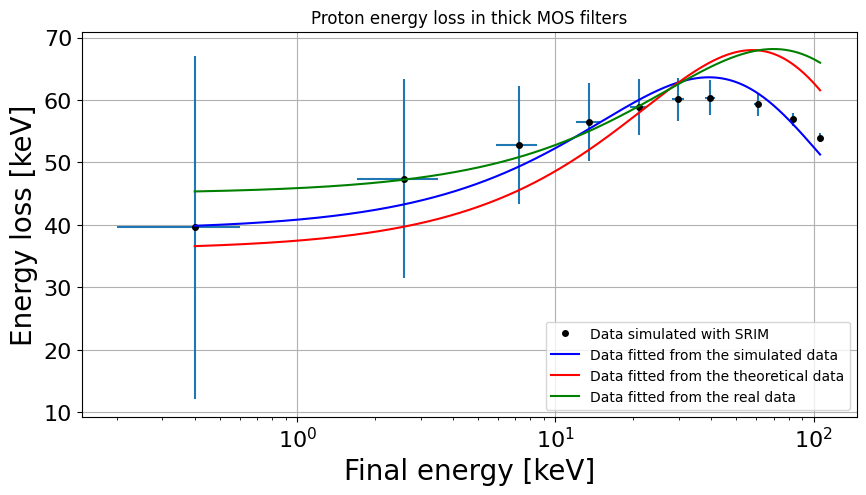

In [11]:
# Plot of energy_function

plt.figure(figsize=[10,5])
plt.title('Proton energy loss in thick MOS filters')
x = np.linspace(final_energy[0],final_energy[9],10000)
plt.xlabel('Final energy [keV]', fontsize=20)
plt.ylabel('Energy loss [keV]', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(True)
plt.xscale("log")
plt.errorbar(final_energy, energy_loss, xerr=final_energy_err, yerr=energy_loss_err, fmt=' ')

plt.plot(final_energy, energy_loss, 'o', markersize=4, color='black', label='Data simulated with SRIM')
initial_energy_fit_1=energy_function(x, DeltaEf_fit, cf_fit, Eff_fit)           # Fit from fimulated data
initial_energy_fit_2=energy_function(x, 45, 0.9, 70)                            # Function from real data
initial_energy_fit_3=energy_function(x, 36, 1.5, 58)                            # Function from theory

plt.plot(x,initial_energy_fit_1 - x, color="blue",  label="Data fitted from the simulated data")
plt.plot(x,initial_energy_fit_3 - x, color="red",   label="Data fitted from the theoretical data")
plt.plot(x,initial_energy_fit_2 - x, color="green", label="Data fitted from the real data")

plt.legend(loc="lower right")

### Protons and thin filters

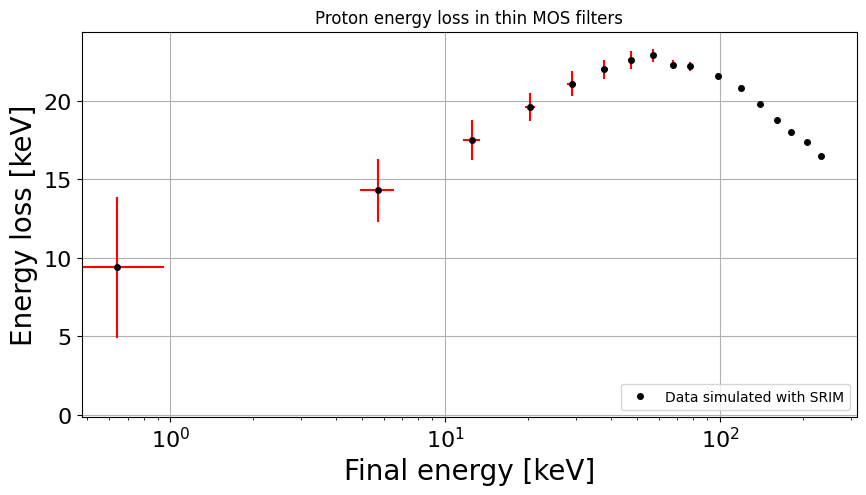

In [12]:
# Repeat everything for the thin filter, always with protons [part 1]

counts           = thin_proton_data['Number of ions transmitted []'].to_numpy()       # Number of ions transmitted (normalized over 100 ions)
energy_loss      = thin_proton_data['Mean energy loss [keV]'].to_numpy()              # Mean energy loss [keV]     (got through statistical methods)
final_energy     = thin_proton_data['Mean final energy [keV]'].to_numpy()             # Mean final energy [keV]    (got through statistical methods)
initial_energy   = thin_proton_data['Initial energy [keV]'].to_numpy()                # Initial energy [keV]       (set on SRIM's GUI)
energy_loss_err  = thin_proton_data['Error on mean energy loss [keV]'].to_numpy()     # Error on mean energy loss [keV]  (got through statistical methods)
final_energy_err = thin_proton_data['Error on mean final energy [keV]'].to_numpy()    # Error on mean final energy [keV] (got through statistical methods)

plt.figure(figsize=[10,5])
plt.title('Proton energy loss in thin MOS filters')
plt.xlabel('Final energy [keV]', fontsize=20)
plt.ylabel('Energy loss [keV]', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(True)
plt.xscale("log")
plt.errorbar(final_energy,energy_loss,xerr=final_energy_err,yerr=energy_loss_err, fmt=' ', color='red')
plt.plot(final_energy, energy_loss, 'o', markersize=4, color='black', label='Data simulated with SRIM')
plt.legend(loc="lower right")


In [13]:
# Repeat everything for the thin filter, always with protons [part 2]

final_energy = np.delete(final_energy, np.s_[14:], axis=0)
energy_loss = np.delete(energy_loss, np.s_[14:], axis=0)
counts = np.delete(counts, np.s_[14:], axis=0)
initial_energy = np.delete(initial_energy, np.s_[14:], axis=0)
final_energy_err = np.delete(final_energy_err, np.s_[14:], axis=0)
energy_loss_err = np.delete(energy_loss_err, np.s_[14:], axis=0)

final_energy = np.delete(final_energy, [0])
energy_loss = np.delete(energy_loss, [0])
counts = np.delete(counts, [0])
initial_energy = np.delete(initial_energy, [0])
final_energy_err = np.delete(final_energy_err, [0])
energy_loss_err = np.delete(energy_loss_err, [0])


Parameters fitted for the energy function
ΔEf_fit      = 9.41e+00  ±  4.1e-01 keV
c_fit        = 6.25e-01  ±  5.4e-02
E_cutoff_fit = 6.15e+01  ±  3.8e+00 keV


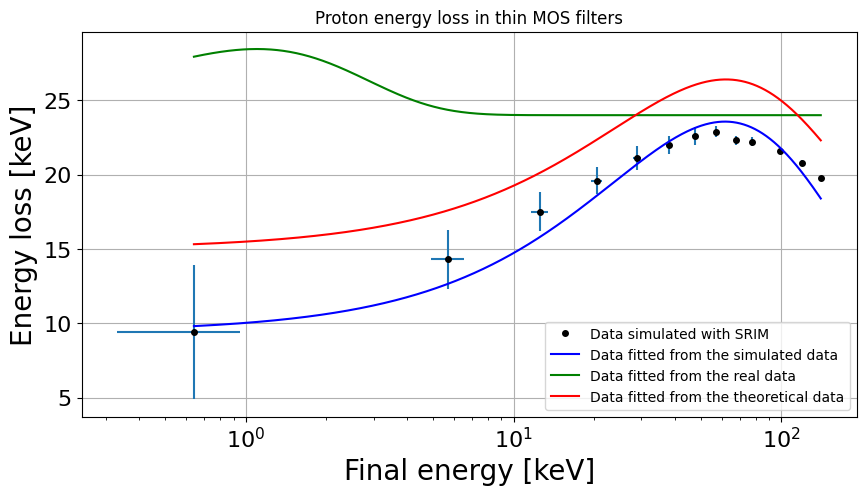

In [14]:
# Repeat everything for the thin filter, always with protons [part 3]

popt, pcov = sop.curve_fit(energy_function,           # Function to be fitted
                           final_energy,              # Final energy
                           initial_energy,            # Initial energy
                           p0 = [15, 0.5, 62],        # Guess (DeltaE, Cf, Eff)
                           ftol=1e-10,                # Relative tolerance
                           xtol=1e-10,                # Absolute tolerance
                           sigma = final_energy_err)  # Uncertainties

DeltaEf_fit = popt[0]
cf_fit      = popt[1]
Eff_fit     = popt[2]
std_err = np.sqrt(np.diag(pcov))

print('Parameters fitted for the energy function')
print('ΔEf_fit      =', np.format_float_scientific(DeltaEf_fit, precision=2), ' ± ', np.format_float_scientific(std_err[0], precision=1), "keV")
print('c_fit        =', np.format_float_scientific(cf_fit,      precision=2), ' ± ', np.format_float_scientific(std_err[1], precision=1))
print('E_cutoff_fit =', np.format_float_scientific(Eff_fit,     precision=2), ' ± ', np.format_float_scientific(std_err[2], precision=1), "keV")

# Plot of energy_function

plt.figure(figsize=[10,5])
plt.title('Proton energy loss in thin MOS filters')
x = np.linspace(final_energy[0],final_energy[12],10000)
plt.xlabel('Final energy [keV]', fontsize=20)
plt.ylabel('Energy loss [keV]', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(True)
plt.xscale("log")
plt.errorbar(final_energy,energy_loss,xerr=final_energy_err,yerr=energy_loss_err, fmt=' ')

plt.plot(final_energy, energy_loss, 'o', markersize=4, color='black', label='Data simulated with SRIM')
initial_energy_fit_1=energy_function(x, DeltaEf_fit, cf_fit, Eff_fit)  # Fit from fimulated data
initial_energy_fit_2=energy_function(x, 24, 11, 1.1)                   # Function from real data
initial_energy_fit_3=energy_function(x, 15, 0.5, 62)                   # Function from theory

plt.plot(x,initial_energy_fit_1 - x, color="blue",  label="Data fitted from the simulated data")
plt.plot(x,initial_energy_fit_2 - x, color="green", label="Data fitted from the real data")
plt.plot(x,initial_energy_fit_3 - x, color="red",   label="Data fitted from the theoretical data")

plt.legend(loc="lower right")
